In [1]:
import copy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

importa and verify data from csv file

In [2]:
df = pd.read_csv("data/samsung_health_sleep.csv")

In [3]:
df.head()

,date,total_sleep_time_weight,mental_recovery,wake_score,factor_01,factor_02,factor_03,factor_04,factor_05,factor_06,...,physical_recovery,movement_awakening,wake_weight,rem_score,sleep_cycle,total_light_duration,efficiency,sleep_duration,total_sleep_time_score,sleep_score
0,2025-08-20,34,68.0,7,34,34,59,0,76,533,...,76.0,36.0,12,8,2,381,85.0,533,31,72
1,2025-08-21,34,82.0,9,28,28,15,2,41,410,...,61.0,24.0,12,20,2,267,90.0,410,25,81
2,2025-08-21,34,5.0,12,11,11,0,0,0,23,...,8.0,0.0,12,1,0,12,100.0,23,2,43
3,2025-08-22,34,70.0,9,15,25,22,1,44,476,...,68.0,22.0,12,11,3,358,90.0,476,33,77
4,2025-08-23,34,64.0,8,4,4,58,0,75,598,...,59.0,31.0,12,1,1,516,87.0,598,32,58


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           125 non-null    object 
 1   total_sleep_time_weight        125 non-null    int64  
 2   mental_recovery                125 non-null    float64
 3   wake_score                     125 non-null    int64  
 4   factor_01                      125 non-null    int64  
 5   factor_02                      125 non-null    int64  
 6   factor_03                      125 non-null    int64  
 7   factor_04                      125 non-null    int64  
 8   factor_05                      125 non-null    int64  
 9   factor_06                      125 non-null    int64  
 10  factor_07                      125 non-null    int64  
 11  factor_08                      125 non-null    int64  
 12  factor_09                      125 non-null    int

In [5]:
df["date"] = pd.to_datetime(df["date"])
df = df.drop("factor_10", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           125 non-null    datetime64[ns]
 1   total_sleep_time_weight        125 non-null    int64         
 2   mental_recovery                125 non-null    float64       
 3   wake_score                     125 non-null    int64         
 4   factor_01                      125 non-null    int64         
 5   factor_02                      125 non-null    int64         
 6   factor_03                      125 non-null    int64         
 7   factor_04                      125 non-null    int64         
 8   factor_05                      125 non-null    int64         
 9   factor_06                      125 non-null    int64         
 10  factor_07                      125 non-null    int64         
 11  factor_08          

In [6]:
df.head()

,date,total_sleep_time_weight,mental_recovery,wake_score,factor_01,factor_02,factor_03,factor_04,factor_05,factor_06,...,physical_recovery,movement_awakening,wake_weight,rem_score,sleep_cycle,total_light_duration,efficiency,sleep_duration,total_sleep_time_score,sleep_score
0,2025-08-20,34,68.0,7,34,34,59,0,76,533,...,76.0,36.0,12,8,2,381,85.0,533,31,72
1,2025-08-21,34,82.0,9,28,28,15,2,41,410,...,61.0,24.0,12,20,2,267,90.0,410,25,81
2,2025-08-21,34,5.0,12,11,11,0,0,0,23,...,8.0,0.0,12,1,0,12,100.0,23,2,43
3,2025-08-22,34,70.0,9,15,25,22,1,44,476,...,68.0,22.0,12,11,3,358,90.0,476,33,77
4,2025-08-23,34,64.0,8,4,4,58,0,75,598,...,59.0,31.0,12,1,1,516,87.0,598,32,58


check relevancy of data on the sleep score

In [7]:
corr = df.corr(numeric_only=True)["sleep_score"].sort_values(ascending=False)
print(corr)

sleep_score                      1.000000
total_rem_duration               0.853695
mental_recovery                  0.850922
rem_score                        0.799854
total_sleep_time_score           0.784489
physical_recovery                0.653203
sleep_duration                   0.616391
factor_06                        0.616391
sleep_cycle                      0.545623
factor_04                        0.449961
total_light_duration             0.441001
wake_score                       0.416626
factor_02                        0.370905
latency_score                    0.315321
factor_01                        0.303147
wake_weight                      0.295806
sleep_efficiency_with_latency    0.273408
factor_05                        0.271509
factor_08                        0.176490
deep_score                       0.137632
factor_07                        0.010640
efficiency                      -0.052391
factor_03                       -0.107031
factor_09                       -0

remove data that doesnt seens to have a big impact on the sleep score

In [8]:
df = df.drop(["total_sleep_time_weight", "factor_01", "factor_02", "factor_03", "factor_04", "factor_05", "factor_06", "factor_07", "factor_08", "factor_09", "latency_weight", "latency_score", "deep_weight", "rem_weight", "wake_weight"], axis=1)

In [9]:
df.head()

,date,mental_recovery,wake_score,deep_score,sleep_efficiency_with_latency,total_rem_duration,physical_recovery,movement_awakening,rem_score,sleep_cycle,total_light_duration,efficiency,sleep_duration,total_sleep_time_score,sleep_score
0,2025-08-20,68.0,7,10,85,42,76.0,36.0,8,2,381,85.0,533,31,72
1,2025-08-21,82.0,9,11,90,74,61.0,24.0,20,2,267,90.0,410,25,81
2,2025-08-21,5.0,12,12,100,0,8.0,0.0,1,0,12,100.0,23,2,43
3,2025-08-22,70.0,9,8,90,49,68.0,22.0,11,3,358,90.0,476,33,77
4,2025-08-23,64.0,8,1,87,3,59.0,31.0,1,1,516,87.0,598,32,58


In [10]:
def split_xy(df, target, features):
    X = df[features].values
    y = df[target].values.reshape(-1, 1)
    return X, y

In [10]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values
  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))
  return data, X, y

Linear Regression | Mental recovery and Total rem duration

In [16]:
train, val, test = df.iloc[:int(0.6*len(df))], df.iloc[int(0.6*len(df)):int(0.8*len(df))], df.iloc[int(0.8*len(df)):]
x_train_mr, y_train_mr = split_xy(train, "sleep_score", ["mental_recovery"])
x_val_mr, y_val_mr = split_xy(val, "sleep_score", ["mental_recovery"])
x_test_mr, y_test_mr = split_xy(test, "sleep_score", ["mental_recovery"])

In [17]:
mr_reg = LinearRegression()
mr_reg.fit(x_train_mr, y_train_mr)
mr_reg.score(x_train_mr, y_train_mr)

0.7591484580144228

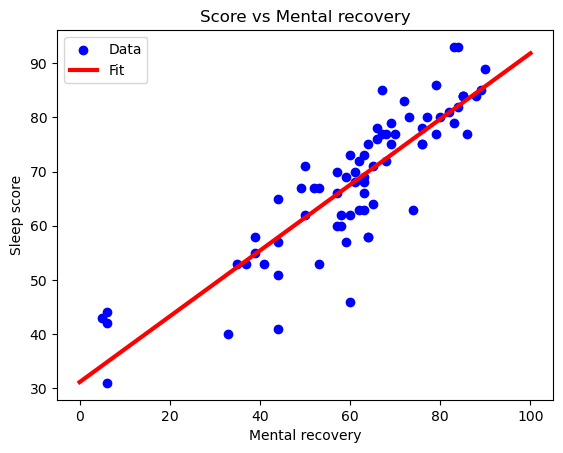

In [19]:
plt.scatter(x_train_mr, y_train_mr, label="Data", color="blue")
x= np.linspace(0, 100, 100)
plt.plot(x, mr_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Score vs Mental recovery")
plt.ylabel("Sleep score")
plt.xlabel("Mental recovery")
plt.show()

In [20]:
train, val, test = df.iloc[:int(0.6*len(df))], df.iloc[int(0.6*len(df)):int(0.8*len(df))], df.iloc[int(0.8*len(df)):]
x_train_trd, y_train_trd = split_xy(train, "sleep_score", ["total_rem_duration"])
x_val_trd, y_val_trd = split_xy(val, "sleep_score", ["total_rem_duration"])
x_test_trd, y_test_trd = split_xy(test, "sleep_score", ["total_rem_duration"])

In [21]:
trd_reg = LinearRegression()
trd_reg.fit(x_train_trd, y_train_trd)
trd_reg.score(x_train_trd, y_train_trd)

0.7279293093184191

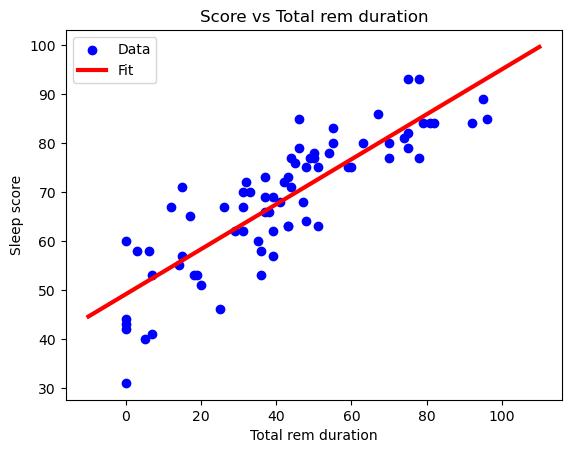

In [22]:
plt.scatter(x_train_trd, y_train_trd, label="Data", color="blue")
x= np.linspace(-10, 110, 100)
plt.plot(x, trd_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Score vs Total rem duration")
plt.ylabel("Sleep score")
plt.xlabel("Total rem duration")
plt.show()

Multi Linear Regression

In [23]:
train, val, test = df.iloc[:int(0.6*len(df))], df.iloc[int(0.6*len(df)):int(0.8*len(df))], df.iloc[int(0.8*len(df)):]
x_train_all, y_train_all = split_xy(train, "sleep_score", df.columns[1:-1])
x_val_all, y_val_all = split_xy(val, "sleep_score", df.columns[1:-1])
x_test_all, y_test_all = split_xy(test, "sleep_score", df.columns[1:-1])

In [24]:
all_reg = LinearRegression()
all_reg.fit(x_train_all, y_train_all)
all_reg.score(x_train_all, y_train_all)

0.973317718083787

In [26]:
coef_df = pd.DataFrame({
    "feature": df.columns[1:-1],
    "coef": all_reg.coef_.flatten()
}).sort_values("coef", key=abs, ascending=False)
print(coef_df)

                          feature      coef
7                       rem_score  1.125531
1                      wake_score  1.071877
12         total_sleep_time_score  1.059359
2                      deep_score  0.720614
8                     sleep_cycle  0.204458
3   sleep_efficiency_with_latency  0.198824
10                     efficiency  0.196154
0                 mental_recovery -0.099295
6              movement_awakening  0.081582
5               physical_recovery  0.043140
9            total_light_duration -0.036543
11                 sleep_duration  0.030830
4              total_rem_duration -0.020583


Regression with NN

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error

features = [
    "mental_recovery",
	"wake_score",
    "deep_score",
	"sleep_efficiency_with_latency",
	"total_rem_duration",
	"physical_recovery",
	"movement_awakening",
	"rem_score",
	"sleep_cycle",
	"total_light_duration",
	"efficiency",
	"sleep_duration" 
]

X = df[features].values
y = df["sleep_score"].values.reshape(-1,1)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

x_train = scaler_X.fit_transform(x_train)
x_test = scaler_X.transform(x_test)

y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [29]:
class SleepRegressor(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

In [30]:
X_train_t = torch.tensor(x_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test_t = torch.tensor(x_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [31]:
model = SleepRegressor(input_dim=x_train.shape[1])

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 500
for epoch in range(epochs):
    model.train()

    y_pred = model(X_train_t)
    loss = criterion(y_pred, y_train_t)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.4f}")


Epoch 0 | Loss: 1.0789
Epoch 50 | Loss: 0.0644
Epoch 100 | Loss: 0.0326
Epoch 150 | Loss: 0.0224
Epoch 200 | Loss: 0.0162
Epoch 250 | Loss: 0.0118
Epoch 300 | Loss: 0.0085
Epoch 350 | Loss: 0.0060
Epoch 400 | Loss: 0.0042
Epoch 450 | Loss: 0.0029


In [32]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_t)

y_pred_test = scaler_y.inverse_transform(y_pred_test.numpy())
y_test_real = scaler_y.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_test))
print(f"RMSE: {rmse:.2f}")


RMSE: 4.05


Temporal window

In [33]:
df = df.sort_values("date").reset_index(drop=True)

base_features = [
    "sleep_duration",
    "sleep_efficiency_with_latency",
    "rem_score",
    "mental_recovery",
    "physical_recovery"
]

In [34]:
def create_sliding_windows(df, features, target, window_size=7):
    X, y = [], []

    for i in range(window_size, len(df)):
        window = df.iloc[i-window_size:i][features].values.flatten()
        X.append(window)
        y.append(df.iloc[i][target])

    return np.array(X), np.array(y)

In [35]:
X, y = create_sliding_windows(
    df,
    features=base_features,
    target="sleep_score",
    window_size=5
)

In [36]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [37]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [38]:
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

In [39]:
class TemporalWindow(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

In [40]:
model = TemporalWindow(input_dim=X_train.shape[1])

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

epochs = 600
for epoch in range(epochs):
    model.train()

    y_pred = model(X_train_t)
    loss = criterion(y_pred, y_train_t)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.4f}")


Epoch 0 | Loss: 1.0518
Epoch 50 | Loss: 0.7296
Epoch 100 | Loss: 0.5109
Epoch 150 | Loss: 0.4611
Epoch 200 | Loss: 0.3973
Epoch 250 | Loss: 0.3460
Epoch 300 | Loss: 0.3352
Epoch 350 | Loss: 0.3109
Epoch 400 | Loss: 0.3110
Epoch 450 | Loss: 0.2442
Epoch 500 | Loss: 0.2679
Epoch 550 | Loss: 0.2863


In [41]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_t)

y_pred_test = scaler_y.inverse_transform(y_pred_test.numpy())
y_test_real = scaler_y.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_test))
print(f"RMSE: {rmse:.2f}")


RMSE: 15.44
